## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [2]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [3]:
df = pd.read_csv('spinal_all_psm_open.csv')

In [4]:
df.shape

(33686, 37)

In [5]:
df.head()

personid                           encounterid  \
0  00fb101f-ec2e-449c-8ed8-bcb5ab901308  72e6aa62-9a19-4dd2-8984-80e0f21344a7   
1  046859e9-2946-437f-a11f-eff2c3a55cc0  b9dc274c-d1b2-4899-a137-fffd9016ed4c   
2  049ab685-ce13-4f78-91ed-c3fda4553221  8163ad9a-fd81-4865-bc7f-9599da4fe835   
3  04d2ea88-e789-4d8e-ba83-9d3b64df691b  7beb85b2-31e1-471f-9870-1e7c1e44851d   
4  050065c2-3579-4f39-a164-386c7afa73f4  27d7915f-714c-40a8-a290-c44f8b253757   

   pre_albumin  early_albumin  late_albumin  albumin  ICU  LOS_days  \
0            0              0             0        0    0  3.336111   
1            0              0             0        0    0  2.253472   
2            0              0             0        0    0  5.439583   
3            0              0             0        0    0  8.509028   
4            0              0             0        0    0  4.040613   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex  \
0                 0                 0.0                  87  64.0  NaN   
1                 0                 0.0                  87  56.0  NaN   
2                 0                 0.0                  69  53.0  NaN   
3                 0                 1.0                  43  52.0  NaN   
4                 0                 1.0                  76  56.0  NaN   

       race  CCI  preop_hypotension  postop_hypotension  MAKE_90  \
0     White    1                  1                   0        0   
1     White    2                  0                   0        0   
2  Hispanic    2                  0                   0        0   
3     Black    7                  0                   0        0   
4     White    0                  0                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            NaN                      Unknown             NaN        NaN   
1            NaN                      Unknown             NaN        NaN   
2            NaN                      Unknown             NaN        NaN   
3            3.2                          Low             NaN        1.2   
4            NaN                      Unknown             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown        NaN                  Unknown            0   
1                  Unknown        NaN                  Unknown            0   
2                  Unknown        NaN                  Unknown            0   
3                   Normal        0.5                   Normal            0   
4                  Unknown        1.1                   Normal            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           0.0            0     0                1          0   94.404936   
1           1.0            1     3                0          0         NaN   
2           0.0            0     0                1          0  114.012480   
3           1.0            1     1                0          0  144.404414   
4           1.0            0     3                0          0   74.647018   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0                Normal    0      15.6                  >= 9.0        1  
1                   NaN    0       NaN                 Unknown        1  
2                Normal    0      12.2                  >= 9.0        1  
3                Normal    0       9.9                  >= 9.0        1  
4  Early Kidney Disease    0      16.8                  >= 9.0        1

In [6]:
df = df[df['non_elective'] == 1]

In [7]:
df.shape

(16730, 37)

In [8]:
df.head()

personid                           encounterid  \
1  046859e9-2946-437f-a11f-eff2c3a55cc0  b9dc274c-d1b2-4899-a137-fffd9016ed4c   
3  04d2ea88-e789-4d8e-ba83-9d3b64df691b  7beb85b2-31e1-471f-9870-1e7c1e44851d   
4  050065c2-3579-4f39-a164-386c7afa73f4  27d7915f-714c-40a8-a290-c44f8b253757   
5  07cab37e-beb8-4b5c-964f-097f7daaae44  ed01c620-715d-4924-9d90-ff8410a5f009   
6  0909e69e-9db2-4e67-8848-6c7ed4d3d902  c799a15f-692f-4792-a98a-f135423c5532   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
1            0              0             0        0    0   2.253472   
3            0              0             0        0    0   8.509028   
4            0              0             0        0    0   4.040613   
5            0              0             0        0    0  22.988519   
6            0              0             1        1    1  10.019444   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
1                 0                 0.0                  87  56.0  NaN  White   
3                 0                 1.0                  43  52.0  NaN  Black   
4                 0                 1.0                  76  56.0  NaN  White   
5                 0                 0.0                  65  67.0  NaN  White   
6                 1                 NaN                   0  62.0  NaN  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
1    2                  0                   0        0            NaN   
3    7                  0                   0        0            3.2   
4    0                  0                   0        0            NaN   
5    2                  0                   0        0            NaN   
6    3                  0                   1        1            NaN   

  preop_albumin_classification  postop_albumin  preop_inr  \
1                      Unknown             NaN        NaN   
3                          Low             NaN        1.2   
4                      Unknown             NaN        NaN   
5                      Unknown             NaN        NaN   
6                      Unknown             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
1                  Unknown        NaN                  Unknown            0   
3                   Normal        0.5                   Normal            0   
4                  Unknown        1.1                   Normal            0   
5                  Unknown        NaN                  Unknown            0   
6                  Unknown        NaN                  Unknown            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
1           1.0            1     3                0          0         NaN   
3           1.0            1     1                0          0  144.404414   
4           1.0            0     3                0          0   74.647018   
5           1.0            0     0                1          0   91.502917   
6           1.0            0     3                1          0   71.566200   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
1                   NaN    0       NaN                 Unknown        1  
3                Normal    0       9.9                  >= 9.0        1  
4  Early Kidney Disease    0      16.8                  >= 9.0        1  
5                Normal    0      13.4                  >= 9.0        1  
6  Early Kidney Disease    0       8.3               8.0 - 8.9        1

In [9]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16730 entries, 1 to 33684
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      16730 non-null  object 
 1   encounterid                   16730 non-null  object 
 2   pre_albumin                   16730 non-null  int64  
 3   early_albumin                 16730 non-null  int64  
 4   late_albumin                  16730 non-null  int64  
 5   albumin                       16730 non-null  int64  
 6   ICU                           16730 non-null  int64  
 7   LOS_days                      16730 non-null  float64
 8   90_day_mortality              16730 non-null  int64  
 9   90_day_readmission            16035 non-null  float64
 10  hospital_free_days            16730 non-null  int64  
 11  age                           16728 non-null  float64
 12  sex                           213 non-null    object 
 13  r

In [11]:
df.isnull().sum()

personid                            0
encounterid                         0
pre_albumin                         0
early_albumin                       0
late_albumin                        0
albumin                             0
ICU                                 0
LOS_days                            0
90_day_mortality                    0
90_day_readmission                695
hospital_free_days                  0
age                                 2
sex                             16517
race                             1328
CCI                                 0
preop_hypotension                   0
postop_hypotension                  0
MAKE_90                             0
preop_albumin                   12959
preop_albumin_classification        0
postop_albumin                  15126
preop_inr                       10463
preop_inr_classification            0
preop_scr                        5529
preop_scr_classification            0
transfusion                         0
non_elective

In [12]:
df.early_albumin.value_counts()

0    16513
1      217
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [13]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    217.000000
mean      17.930465
std       20.106318
min        0.315972
25%        6.855382
50%       11.369306
75%       20.218472
max      171.895833
Name: LOS_days, dtype: float64

In [14]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    16513.000000
mean        13.355528
std         18.257193
min          0.199306
25%          5.660417
50%          9.012847
75%         14.940278
max        663.624306
Name: LOS_days, dtype: float64

In [15]:
df[df['albumin'] == 1].CCI.describe()

count    3481.000000
mean        2.571962
std         2.794814
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: CCI, dtype: float64

In [16]:
df[df['albumin'] == 0].CCI.describe()

count    13249.000000
mean         1.904446
std          2.338649
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         15.000000
Name: CCI, dtype: float64

In [17]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    207
1     10
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 4.6082949308755765


In [18]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    15828
1      685
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 4.148246835826319


In [19]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

0.0    129
1.0     78
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 37.68115942028986


In [20]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    10330
1.0     5498
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 34.735911043719994


In [21]:
df.head()

personid                           encounterid  \
1  046859e9-2946-437f-a11f-eff2c3a55cc0  b9dc274c-d1b2-4899-a137-fffd9016ed4c   
3  04d2ea88-e789-4d8e-ba83-9d3b64df691b  7beb85b2-31e1-471f-9870-1e7c1e44851d   
4  050065c2-3579-4f39-a164-386c7afa73f4  27d7915f-714c-40a8-a290-c44f8b253757   
5  07cab37e-beb8-4b5c-964f-097f7daaae44  ed01c620-715d-4924-9d90-ff8410a5f009   
6  0909e69e-9db2-4e67-8848-6c7ed4d3d902  c799a15f-692f-4792-a98a-f135423c5532   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
1            0              0             0        0    0   2.253472   
3            0              0             0        0    0   8.509028   
4            0              0             0        0    0   4.040613   
5            0              0             0        0    0  22.988519   
6            0              0             1        1    1  10.019444   

   90_day_mortality  90_day_readmission  hospital_free_days   age  sex   race  \
1                 0                 0.0                  87  56.0  NaN  White   
3                 0                 1.0                  43  52.0  NaN  Black   
4                 0                 1.0                  76  56.0  NaN  White   
5                 0                 0.0                  65  67.0  NaN  White   
6                 1                 NaN                   0  62.0  NaN  White   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
1    2                  0                   0        0            NaN   
3    7                  0                   0        0            3.2   
4    0                  0                   0        0            NaN   
5    2                  0                   0        0            NaN   
6    3                  0                   1        1            NaN   

  preop_albumin_classification  postop_albumin  preop_inr  \
1                      Unknown             NaN        NaN   
3                          Low             NaN        1.2   
4                      Unknown             NaN        NaN   
5                      Unknown             NaN        NaN   
6                      Unknown             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
1                  Unknown        NaN                  Unknown            0   
3                   Normal        0.5                   Normal            0   
4                  Unknown        1.1                   Normal            0   
5                  Unknown        NaN                  Unknown            0   
6                  Unknown        NaN                  Unknown            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
1           1.0            1     3                0          0         NaN   
3           1.0            1     1                0          0  144.404414   
4           1.0            0     3                0          0   74.647018   
5           1.0            0     0                1          0   91.502917   
6           1.0            0     3                1          0   71.566200   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
1                   NaN    0       NaN                 Unknown        1  
3                Normal    0       9.9                  >= 9.0        1  
4  Early Kidney Disease    0      16.8                  >= 9.0        1  
5                Normal    0      13.4                  >= 9.0        1  
6  Early Kidney Disease    0       8.3               8.0 - 8.9        1

In [22]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [23]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [24]:
df_a24.head()

personid                           encounterid  \
1  046859e9-2946-437f-a11f-eff2c3a55cc0  b9dc274c-d1b2-4899-a137-fffd9016ed4c   
3  04d2ea88-e789-4d8e-ba83-9d3b64df691b  7beb85b2-31e1-471f-9870-1e7c1e44851d   
4  050065c2-3579-4f39-a164-386c7afa73f4  27d7915f-714c-40a8-a290-c44f8b253757   
5  07cab37e-beb8-4b5c-964f-097f7daaae44  ed01c620-715d-4924-9d90-ff8410a5f009   
6  0909e69e-9db2-4e67-8848-6c7ed4d3d902  c799a15f-692f-4792-a98a-f135423c5532   

   pre_albumin  early_albumin  late_albumin  ICU   LOS_days  90_day_mortality  \
1            0              0             0    0   2.253472                 0   
3            0              0             0    0   8.509028                 0   
4            0              0             0    0   4.040613                 0   
5            0              0             0    0  22.988519                 0   
6            0              0             1    1  10.019444                 1   

   90_day_readmission  hospital_free_days  vasopressor  sex   race  \
1                 0.0                  87            1  NaN  White   
3                 1.0                  43            1  NaN  Black   
4                 1.0                  76            0  NaN  White   
5                 0.0                  65            0  NaN  White   
6                 NaN                   0            0  NaN  White   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
1                   0        0            NaN                      Unknown   
3                   0        0            3.2                          Low   
4                   0        0            NaN                      Unknown   
5                   0        0            NaN                      Unknown   
6                   1        1            NaN                      Unknown   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
1             NaN        NaN                  Unknown        NaN   
3             NaN        1.2                   Normal        0.5   
4             NaN        NaN                  Unknown        1.1   
5             NaN        NaN                  Unknown        NaN   
6             NaN        NaN                  Unknown        NaN   

  preop_scr_classification  transfusion  non_elective        eGFR  \
1                  Unknown            0           1.0         NaN   
3                   Normal            0           1.0  144.404414   
4                   Normal            0           1.0   74.647018   
5                  Unknown            0           1.0   91.502917   
6                  Unknown            0           1.0   71.566200   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
1                   NaN    0       NaN                 Unknown        1  
3                Normal    0       9.9                  >= 9.0        1  
4  Early Kidney Disease    0      16.8                  >= 9.0        1  
5                Normal    0      13.4                  >= 9.0        1  
6  Early Kidney Disease    0       8.3               8.0 - 8.9        1

In [25]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [26]:
df.shape

(16730, 8)

In [27]:
df.head()

encounterid  albumin   age  CCI  \
1  b9dc274c-d1b2-4899-a137-fffd9016ed4c        0  56.0    2   
3  7beb85b2-31e1-471f-9870-1e7c1e44851d        0  52.0    7   
4  27d7915f-714c-40a8-a290-c44f8b253757        0  56.0    0   
5  ed01c620-715d-4924-9d90-ff8410a5f009        0  67.0    2   
6  c799a15f-692f-4792-a98a-f135423c5532        1  62.0    3   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
1                  0     3                0          0  
3                  0     1                0          0  
4                  0     3                0          0  
5                  0     0                1          0  
6                  0     3                1          0

In [28]:
df.isnull().sum()

encounterid          0
albumin              0
age                  2
CCI                  0
preop_hypotension    0
NEWS                 0
bl_hypertension      0
preop_MAP            0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(16728, 8)

In [31]:
df.albumin.value_counts()

0    13247
1     3481
Name: albumin, dtype: int64

In [32]:
df.head()

encounterid  albumin   age  CCI  \
1  b9dc274c-d1b2-4899-a137-fffd9016ed4c        0  56.0    2   
3  7beb85b2-31e1-471f-9870-1e7c1e44851d        0  52.0    7   
4  27d7915f-714c-40a8-a290-c44f8b253757        0  56.0    0   
5  ed01c620-715d-4924-9d90-ff8410a5f009        0  67.0    2   
6  c799a15f-692f-4792-a98a-f135423c5532        1  62.0    3   

   preop_hypotension  NEWS  bl_hypertension  preop_MAP  
1                  0     3                0          0  
3                  0     1                0          0  
4                  0     3                0          0  
5                  0     0                1          0  
6                  0     3                1          0

## Initialize PsmPy Class

In [33]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [34]:
%%time
psm.logistic_ps(balance = True)

Wall time: 13 s


In [35]:
df_psm = psm.predicted_data

In [36]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  c799a15f-692f-4792-a98a-f135423c5532  62.0    3                  0     3   
1  843fe88c-e63d-4a9a-a33c-c24c1826e817  35.0    2                  1     9   
2  c6dde619-905d-4723-a285-9ee0fbfd4efb  41.0    9                  0     3   
3  f67b0559-18e7-4816-8e04-8ca1530a0f4a  63.0    3                  0     0   
4  0c125d13-eab3-4bb1-b1f7-d336847f62ba  74.0    0                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.509107          0.036431        1  
1                0          0          0.803459          1.408056        1  
2                1          0          0.682447          0.765038        1  
3                1          0          0.409280         -0.366942        1  
4                0          0          0.470519         -0.118059        1

## Plot the propensity score / propensity logits

In [37]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 27min


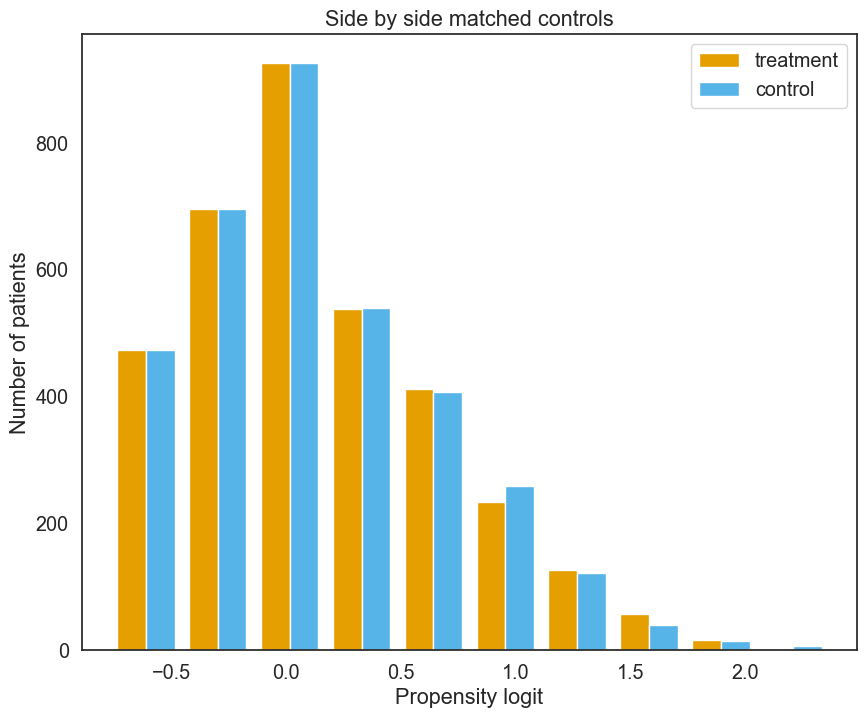

In [38]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

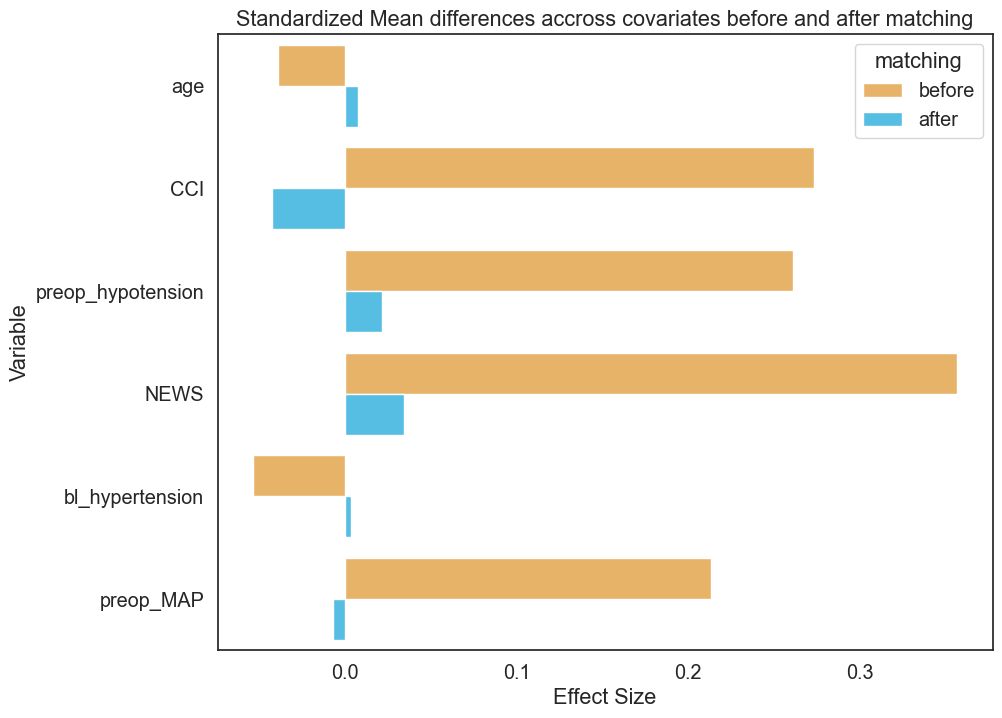

In [39]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [40]:
matched_df = psm.df_matched

In [41]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  c799a15f-692f-4792-a98a-f135423c5532  62.0    3                  0     3   
1  843fe88c-e63d-4a9a-a33c-c24c1826e817  35.0    2                  1     9   
2  c6dde619-905d-4723-a285-9ee0fbfd4efb  41.0    9                  0     3   
3  f67b0559-18e7-4816-8e04-8ca1530a0f4a  63.0    3                  0     0   
4  0c125d13-eab3-4bb1-b1f7-d336847f62ba  74.0    0                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.509107          0.036431        1  
1                0          0          0.803459          1.408056        1  
2                1          0          0.682447          0.765038        1  
3                1          0          0.409280         -0.366942        1  
4                0          0          0.470519         -0.118059        1

In [42]:
matched_df.shape

(6962, 10)

## Matched Ids

In [43]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  c799a15f-692f-4792-a98a-f135423c5532  89845a27-1c4d-48d0-b4c5-cfc021d652a4
1  843fe88c-e63d-4a9a-a33c-c24c1826e817  181af6df-0a9c-4794-bc6e-04187ea0a5b9
2  c6dde619-905d-4723-a285-9ee0fbfd4efb  af41b41c-757e-43e0-9046-e56dfa37c3dc
3  f67b0559-18e7-4816-8e04-8ca1530a0f4a  aedbbce3-6e52-4c36-a344-495ee57e44b1
4  0c125d13-eab3-4bb1-b1f7-d336847f62ba  633f106f-78e3-4c91-837e-75b22508a36c

## Effect sizes per variables

In [44]:
psm.effect_size

Variable matching  Effect Size
0                 age   before    -0.038918
1                 age    after     0.007725
2                 CCI   before     0.273410
3                 CCI    after    -0.042473
4   preop_hypotension   before     0.261127
5   preop_hypotension    after     0.021409
6                NEWS   before     0.356820
7                NEWS    after     0.034124
8     bl_hypertension   before    -0.053847
9     bl_hypertension    after     0.003450
10          preop_MAP   before     0.213557
11          preop_MAP    after    -0.006924

## Explore Matched df

In [45]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  c799a15f-692f-4792-a98a-f135423c5532  62.0    3                  0     3   
1  843fe88c-e63d-4a9a-a33c-c24c1826e817  35.0    2                  1     9   
2  c6dde619-905d-4723-a285-9ee0fbfd4efb  41.0    9                  0     3   
3  f67b0559-18e7-4816-8e04-8ca1530a0f4a  63.0    3                  0     0   
4  0c125d13-eab3-4bb1-b1f7-d336847f62ba  74.0    0                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.509107          0.036431        1  
1                0          0          0.803459          1.408056        1  
2                1          0          0.682447          0.765038        1  
3                1          0          0.409280         -0.366942        1  
4                0          0          0.470519         -0.118059        1

In [46]:
matched_df.albumin.value_counts()

1    3481
0    3481
Name: albumin, dtype: int64

In [47]:
matched_df.shape

(6962, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [48]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [49]:
f_df.shape

(6962, 39)

In [50]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  c799a15f-692f-4792-a98a-f135423c5532  62.0    3                  0     3   
1  843fe88c-e63d-4a9a-a33c-c24c1826e817  35.0    2                  1     9   
2  c6dde619-905d-4723-a285-9ee0fbfd4efb  41.0    9                  0     3   
3  f67b0559-18e7-4816-8e04-8ca1530a0f4a  63.0    3                  0     0   
4  0c125d13-eab3-4bb1-b1f7-d336847f62ba  74.0    0                  0     3   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                1          0          0.509107          0.036431        1   
1                0          0          0.803459          1.408056        1   
2                1          0          0.682447          0.765038        1   
3                1          0          0.409280         -0.366942        1   
4                0          0          0.470519         -0.118059        1   

                               personid  pre_albumin  early_albumin  \
0  0909e69e-9db2-4e67-8848-6c7ed4d3d902            0              0   
1  09175a2f-0f8f-4576-bff6-c31661fced9c            0              0   
2  34bd69ac-dc2d-44fb-83b7-ceae84332fc0            0              0   
3  3683cd98-2d43-4efb-9be6-006dad4caea2            0              0   
4  3e735079-0b5d-4f74-b71d-9f72f06c96a3            0              1   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             1    1  10.019444                 1                 NaN   
1             1    1  44.481250                 0                 0.0   
2             1    0  15.825648                 0                 1.0   
3             1    0  23.645833                 0                 0.0   
4             0    0   3.110660                 0                 0.0   

   hospital_free_days  vasopressor  sex     race  postop_hypotension  MAKE_90  \
0                   0            0  NaN    White                   1        1   
1                  46            0    F  Unknown                   0        1   
2                   9            0  NaN    Other                   0        0   
3                  48            0  NaN    White                   1        0   
4                  87            1  NaN    White                   0        0   

   preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
0            NaN                      Unknown             NaN        NaN   
1            NaN                      Unknown             3.2       1.20   
2            NaN                      Unknown             NaN       1.03   
3            1.7                          Low             NaN       1.20   
4            4.1                       Normal             NaN        NaN   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                  Unknown        NaN                  Unknown            0   
1                   Normal       1.00                   Normal            1   
2                   Normal       0.98                   Normal            0   
3                   Normal       0.56                   Normal            0   
4                  Unknown       1.00                   Normal            0   

   non_elective        eGFR   eGFR_classification  LVR  preop_hb  \
0           1.0   71.566200  Early Kidney Disease    0       8.3   
1           1.0   72.931327  Early Kidney Disease    1      11.1   
2           1.0   95.372940                Normal    0      13.9   
3           1.0  110.080441                Normal    1       8.7   
4           1.0   73.814672  Early Kidney Disease    0       NaN   

  preop_hb_classification  open_pr  
0               8.0 - 8.9        1  
1                  >= 9.0        1  
2                  >= 9.0        1  
3               8.0 - 8.9        1  
4                 Unknown        1

In [51]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [52]:
f_df.albumin.value_counts()

1    3481
0    3481
Name: albumin, dtype: int64

In [53]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    217.000000
mean      17.930465
std       20.106318
min        0.315972
25%        6.855382
50%       11.369306
75%       20.218472
max      171.895833
Name: LOS_days, dtype: float64

In [54]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    6745.000000
mean       16.554879
std        23.414285
min         0.347222
25%         6.887639
50%        10.955799
75%        18.634722
max       663.624306
Name: LOS_days, dtype: float64

In [55]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [56]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    207
1     10
Name: 90_day_mortality, dtype: int64


In [57]:
mrate(m)

30 Day Mortality Rate (pct): 4.6082949308755765


In [58]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    6300
1     445
Name: 90_day_mortality, dtype: int64


In [59]:
mrate(m1)

30 Day Mortality Rate (pct): 6.597479614529281


In [60]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

0.0    129
1.0     78
Name: 90_day_readmission, dtype: int64


In [61]:
rrate(r)

30 Day Readmission Rate (pct): 37.68115942028986


In [62]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    4029
1.0    2271
Name: 90_day_readmission, dtype: int64


In [63]:
rrate(r1)

30 Day Readmission Rate (pct): 36.047619047619044


In [64]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [65]:
a_df['CCI'].describe()

count    3481.000000
mean        2.571962
std         2.794814
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        16.000000
Name: CCI, dtype: float64

In [66]:
na_df['CCI'].describe()

count    3481.000000
mean        2.692617
std         2.886010
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: CCI, dtype: float64

In [67]:
a_df['age'].describe()

count    3481.000000
mean       55.676530
std        19.380401
min         0.000000
25%        44.000000
50%        59.000000
75%        70.000000
max        89.000000
Name: age, dtype: float64

In [68]:
na_df['age'].describe()

count    3481.000000
mean       55.532031
std        18.002927
min         0.000000
25%        44.000000
50%        58.000000
75%        69.000000
max        89.000000
Name: age, dtype: float64

In [69]:
a_df['preop_hypotension'].value_counts()

0    3060
1     421
Name: preop_hypotension, dtype: int64

In [70]:
na_df['preop_hypotension'].value_counts()

0    3084
1     397
Name: preop_hypotension, dtype: int64

In [71]:
a_df['NEWS'].describe()

count    3481.000000
mean        2.688021
std         2.610280
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: NEWS, dtype: float64

In [72]:
na_df['NEWS'].describe()

count    3481.000000
mean        2.600402
std         2.524316
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: NEWS, dtype: float64

In [73]:
a_df['bl_hypertension'].value_counts()

0    1812
1    1669
Name: bl_hypertension, dtype: int64

In [74]:
na_df['bl_hypertension'].value_counts()

0    1818
1    1663
Name: bl_hypertension, dtype: int64

In [75]:
a_df['preop_MAP'].value_counts()

0    3253
1     228
Name: preop_MAP, dtype: int64

In [76]:
na_df['preop_MAP'].value_counts()

0    3247
1     234
Name: preop_MAP, dtype: int64

In [77]:
f_df.to_csv('spinal_procedures_ps_matched_221018.csv', index=False)